<a href="https://colab.research.google.com/github/AditM99/Diabetic-Retinopathy/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image
from tensorflow.keras.preprocessing import image
# import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = (256,256)
#(250, 500)
NUM_CLASSES = 5
BATCH_SIZE = 6
NUM_EPOCH = 15
FREEZE_LAYERS = 16
LEARNING_RATE = 0.0002
DROP_OUT = .2

In [ ]:
TRAINING_DATA_PATH = '/content/drive/MyDrive/output/train'
VALID_DATA_DIR = '/content/drive/MyDrive/output/val'

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1/255,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.6,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [ ]:
test_data_gen=ImageDataGenerator(rescale=1/255,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.6,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [ ]:
train_batches = train_data_gen.flow_from_directory(TRAINING_DATA_PATH,
                                                  target_size=IMG_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode = 'categorical'
                                                  )

Found 1394 images belonging to 5 classes.


In [ ]:
valid_batches = test_data_gen.flow_from_directory(VALID_DATA_DIR,
                                                  target_size=IMG_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode = 'categorical'
                                                  )

Found 350 images belonging to 5 classes.


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.optimizers import RMSprop

RESNET

In [ ]:

# base_model=tf.keras.applications.ResNet152V2(include_top=False,weights='imagenet',input_shape=(256,256,3))
# base_model.trainable=False
# model=tf.keras.Sequential()
# model.add(base_model)
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
# model.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               33554688  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 91,886,593
Trainable params: 33,554,945
Non-trainable params: 58,331,648
________________________________

MOBILE NET

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(256,256,3))
base_model.trainable=False
model=tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()



17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 256)               16777472  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 20,006,593
Trainable params: 16,777,729
Non

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
INCEPTION

In [ ]:
googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=5e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

219070464/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 7685      
                                                                 
Total params: 54,344,421
Trainable params: 54,283,877
Non-trainable params: 60,544
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=0, mode='auto')
EPOCHS = 16
BATCH_SIZE = 6

In [ ]:
history=model.fit(train_batches,epochs=EPOCHS,steps_per_epoch=47,validation_data=valid_batches)

Epoch 1/16
47/47 [==============================] - 479s 10s/step - loss: 1.4117 - accuracy: 0.4043 - val_loss: 1.1042 - val_accuracy: 0.5743
Epoch 2/16
47/47 [==============================] - 455s 10s/step - loss: 1.1113 - accuracy: 0.5957 - val_loss: 1.2634 - val_accuracy: 0.5800
Epoch 3/16
47/47 [==============================] - 460s 10s/step - loss: 1.0486 - accuracy: 0.5745 - val_loss: 1.3424 - val_accuracy: 0.5743
Epoch 4/16
47/47 [==============================] - 461s 10s/step - loss: 1.0412 - accuracy: 0.6206 - val_loss: 1.2134 - val_accuracy: 0.5800
Epoch 5/16
47/47 [==============================] - 456s 10s/step - loss: 0.9898 - accuracy: 0.6223 - val_loss: 1.3831 - val_accuracy: 0.5714
Epoch 6/16
47/47 [==============================] - 467s 10s/step - loss: 0.9344 - accuracy: 0.6170 - val_loss: 2.1883 - val_accuracy: 0.5857
Epoch 7/16
47/47 [==============================] - 469s 10s/step - loss: 0.9909 - accuracy: 0.5993 - val_loss: 1.0085 - val_accuracy: 0.6200
Epoch 

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
#                               patience=5, min_lr=0.001)
# # model.fit(train_batches, callbacks=[reduce_lr])

In [ ]:
epochs=16
history=model.fit(train_batches,epochs=epochs,steps_per_epoch=47,validation_data=valid_batches)

NameError: ignored

In [ ]:
model.save('resnet.h5')

In [ ]:
import cv2

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/MyDrive/output/train/0_image/20051020_43808_0100_PP.png')
img1=cv2.imread('/content/drive/MyDrive/output/train/0_image/20051020_44261_0100_PP.png')
img2=cv2.imread('/content/drive/MyDrive/output/train/0_image/20051020_44284_0100_PP.png')
img3=cv2.imread('/content/drive/MyDrive/output/train/0_image/20051020_44338_0100_PP.png')

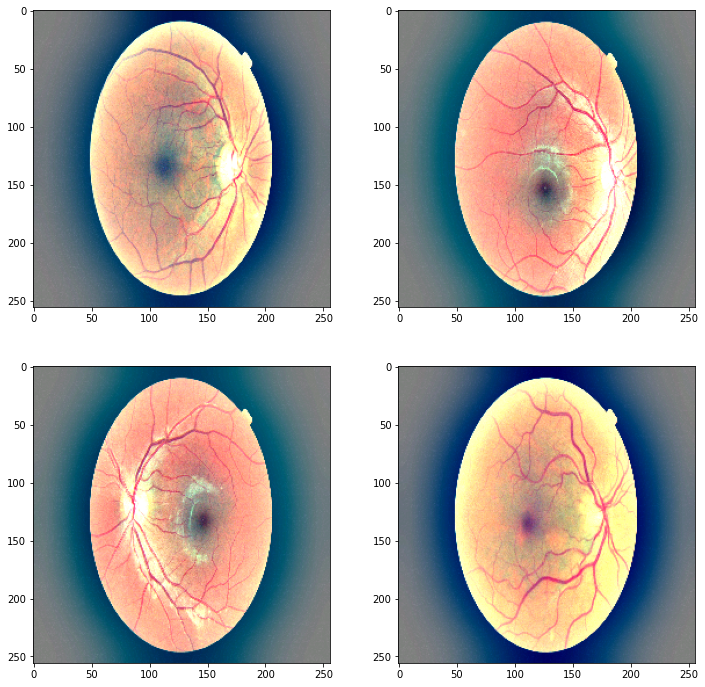

In [ ]:
figure,axis = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axis[0,0].imshow(img)
axis[0,1].imshow(img1)
axis[1,0].imshow(img2)
axis[1,1].imshow(img3)